In [47]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [48]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [49]:
# Define paths to image folders
train_low_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low"  # Path to folder containing low-resolution training images
train_high_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Normal"  # Path to folder containing high-resolution training images
eval_low_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Test/Low"  # Path to folder containing low-resolution evaluation images
eval_high_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Test/Normal"  # Path to folder containing high-resolution evaluation images
train_low_synt_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Synthetic/Train/Low"
train_high_synt_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Synthetic/Train/Normal"
eval_low_synt_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Synthetic/Test/Low"
eval_high_synt_folder = "/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Synthetic/Test/Normal"

In [50]:
train_low_images_list = []
train_high_images_list = []
eval_low_images_list = []
eval_high_images_list = []

train_low_synt_images_list = []
train_high_synt_images_list = []
eval_low_synt_images_list = []
eval_high_synt_images_list = []

for filename in os.listdir(train_low_folder):
    if "png" in filename.strip().split(".")[-1]:
        train_low_images_list.append(filename)

for filename in os.listdir(train_high_folder):
    if "png" in filename.strip().split(".")[-1]:
        train_high_images_list.append(filename)

for filename in os.listdir(eval_low_folder):
    if "png" in filename.strip().split(".")[-1]:
        eval_low_images_list.append(filename)

for filename in os.listdir(eval_high_folder):
    if "png" in filename.strip().split(".")[-1]:
        eval_high_images_list.append(filename)

for filename in os.listdir(train_low_synt_folder):
    if "png" in filename.strip().split(".")[-1]:
        train_low_synt_images_list.append(filename)

for filename in os.listdir(train_high_synt_folder):
    if "png" in filename.strip().split(".")[-1]:
        train_high_synt_images_list.append(filename)

for filename in os.listdir(eval_low_synt_folder):
    if "png" in filename.strip().split(".")[-1]:
        eval_low_synt_images_list.append(filename)

for filename in os.listdir(eval_high_synt_folder):
    if "png" in filename.strip().split(".")[-1]:
        eval_high_synt_images_list.append(filename)

In [51]:
train_low_images_list = sorted(train_low_images_list)
train_high_images_list = sorted(train_high_images_list)
eval_low_images_list = sorted(eval_low_images_list)
eval_high_images_list = sorted(eval_high_images_list)

train_low_synt_images_list = sorted(train_low_synt_images_list)
train_high_synt_images_list = sorted(train_high_synt_images_list)
eval_low_synt_images_list = sorted(eval_low_synt_images_list)
eval_high_synt_images_list = sorted(eval_high_synt_images_list)

In [52]:
train_low_images_list[0]

'low00001.png'

In [53]:
# Load low-resolution and high-resolution images using OpenCV
train_low_images = [cv2.imread(os.path.join(train_low_folder, filename)) for filename in train_low_images_list]
train_high_images = [cv2.imread(os.path.join(train_high_folder, filename)) for filename in train_high_images_list]
eval_low_images = [cv2.imread(os.path.join(eval_low_folder, filename)) for filename in eval_low_images_list]
eval_high_images = [cv2.imread(os.path.join(eval_high_folder, filename)) for filename in eval_high_images_list]

train_low_images_fld_list = [os.path.join(train_low_folder, filename) for filename in train_low_images_list]
train_high_images_fld_list = [os.path.join(train_high_folder, filename) for filename in train_high_images_list]
eval_low_images_fld_list = [os.path.join(eval_low_folder, filename) for filename in eval_low_images_list]
eval_high_images_fld_list = [os.path.join(eval_high_folder, filename) for filename in eval_high_images_list]

train_low_synt_images = [cv2.imread(os.path.join(train_low_synt_folder, filename)) for filename in train_low_synt_images_list]
train_high_synt_images = [cv2.imread(os.path.join(train_high_synt_folder, filename)) for filename in train_high_synt_images_list]
eval_low_synt_images = [cv2.imread(os.path.join(eval_low_synt_folder, filename)) for filename in eval_low_synt_images_list]
eval_high_synt_images = [cv2.imread(os.path.join(eval_high_synt_folder, filename)) for filename in eval_high_synt_images_list]

train_low_synt_images_fld_list = [os.path.join(train_low_synt_folder, filename) for filename in train_low_synt_images_list]
train_high_synt_images_fld_list = [os.path.join(train_high_synt_folder, filename) for filename in train_high_synt_images_list]
eval_low_synt_images_fld_list = [os.path.join(eval_low_synt_folder, filename) for filename in eval_low_synt_images_list]
eval_high_synt_images_fld_list = [os.path.join(eval_high_synt_folder, filename) for filename in eval_high_synt_images_list]

train_low_images = train_low_images + train_low_synt_images
train_high_images = train_high_images + train_high_synt_images
eval_low_images = eval_low_images + eval_low_synt_images
eval_high_images = eval_high_images + eval_high_synt_images

train_low_images_fld_list = train_low_images_fld_list + train_low_synt_images_fld_list
train_high_images_fld_list = train_high_images_fld_list + train_high_synt_images_fld_list
eval_low_images_fld_list = eval_low_images_fld_list + eval_low_synt_images_fld_list
eval_high_images_fld_list = eval_high_images_fld_list + eval_high_synt_images_fld_list

In [54]:
train_low_images_fld_list

['/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00001.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00002.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00003.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00004.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00005.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00006.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00007.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00008.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00009.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00010.png',
 '/home/dgreen/sem2/dl/finalProject/LOL-v2/LOL-v2/Real_captured/Train/Low/low00011.png',
 '/home/dgreen/sem2/d

In [55]:
# train_low_images_list = train_low_images_list + train_low_synt_images_list
# train_high_images_list = train_high_images_list + train_high_synt_images_list
# eval_low_images_list = eval_low_images_list + eval_low_synt_images_list
# eval_high_images_list = eval_high_images_list + eval_high_synt_images_list

In [56]:
import os
import cv2
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, low_res_images, high_res_images, transform=None, resize=(384, 384)):
        self.low_res_images = low_res_images
        self.high_res_images = high_res_images
        self.transform = transform
        self.resize = resize

    def __len__(self):
        return len(self.low_res_images)

    def __getitem__(self, idx):
        try:
            low_res_image = Image.open(self.low_res_images[idx]).convert('RGB')
            high_res_image = Image.open(self.high_res_images[idx]).convert('RGB')

            # Resize images
            low_res_image = low_res_image.resize(self.resize, Image.BICUBIC)
            high_res_image = high_res_image.resize(self.resize, Image.BICUBIC)
            
            if self.transform:
                low_res_image = self.transform(low_res_image)
                high_res_image = self.transform(high_res_image)
            
            return low_res_image, high_res_image
        except Exception as e:
            print(f"Error loading image at index {idx}: {e}")
            return None, None

# Define transformation for preprocessing
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load datasets
train_dataset = CustomDataset(train_low_images_fld_list, train_high_images_fld_list, transform=transform)
eval_dataset = CustomDataset(eval_low_images_fld_list, eval_high_images_fld_list, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(eval_dataset, batch_size=32, shuffle=False)
eval_loader = DataLoader(eval_dataset, batch_size=1, shuffle=False)


In [57]:
# Define the diffusion model
class DiffusionModel(nn.Module):
    def __init__(self):
        super(DiffusionModel, self).__init__()

        # Encoder
        self.encoder_conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.encoder_conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.encoder_pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Decoder
        self.decoder_upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.decoder_conv1 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.decoder_conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.decoder_conv3 = nn.Conv2d(64, 3, kernel_size=3, padding=1)

    def forward(self, x):
        # Encoder
        x1 = nn.functional.relu(self.encoder_conv1(x))
        x2 = nn.functional.relu(self.encoder_conv2(x1))
        x_pool = self.encoder_pool(x2)

        # Decoder
        x_upsample = self.decoder_upsample(x_pool)
        x_concat = torch.cat([x2, x_upsample], dim=1)
        x3 = nn.functional.relu(self.decoder_conv1(x_concat))
        x4 = nn.functional.relu(self.decoder_conv2(x3))
        x_out = nn.functional.relu(self.decoder_conv3(x4))
        
        return x_out

# Define PSNR function
def psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

In [ ]:
# Initialize the diffusion model and move it to GPU
model = DiffusionModel().to(device)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_psnr_history = []
test_psnr_history = []
for epoch in range(num_epochs):
    model.train()
    train_psnr_sum = 0.0
    train_num_samples = 0
    for inputs, targets in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Training'):
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = torch.mean((outputs - targets)**2)  # Mean Squared Error loss
        loss.backward()
        optimizer.step()

        # Calculate PSNR on training data
        train_psnr_sum += torch.sum(psnr(outputs, targets))
        train_num_samples += inputs.size(0)
    avg_train_psnr = train_psnr_sum / train_num_samples
    train_psnr_history.append(avg_train_psnr.item())

    # Evaluate PSNR on test dataset
    model.eval()
    test_psnr_sum = 0.0
    test_num_samples = 0
    for inputs, targets in tqdm(test_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Testing'):
        inputs, targets = inputs.to(device), targets.to(device)  # Move data to GPU
        with torch.no_grad():
            outputs = model(inputs)
            for i in range(inputs.size(0)):
                test_psnr_sum += psnr(outputs[i], targets[i])
                test_num_samples += 1
    avg_test_psnr = test_psnr_sum / test_num_samples
    test_psnr_history.append(avg_test_psnr.item())
    print(f'Average PSNR on test dataset: {avg_test_psnr:.2f} dB')

Epoch 1/10 - Testing: 100%|██████████| 7/7 [00:32<00:00,  4.69s/it]


Average PSNR on test dataset: 17.29 dB


Epoch 2/10 - Testing: 100%|██████████| 7/7 [00:36<00:00,  5.26s/it]


Average PSNR on test dataset: 17.37 dB


Epoch 3/10 - Testing: 100%|██████████| 7/7 [00:22<00:00,  3.20s/it]


Average PSNR on test dataset: 17.57 dB


Epoch 4/10 - Testing: 100%|██████████| 7/7 [00:25<00:00,  3.68s/it]


Average PSNR on test dataset: 17.17 dB


Epoch 5/10 - Testing: 100%|██████████| 7/7 [00:48<00:00,  6.97s/it]


Average PSNR on test dataset: 17.70 dB


Epoch 6/10 - Testing: 100%|██████████| 7/7 [00:22<00:00,  3.17s/it]


Average PSNR on test dataset: 18.25 dB


Epoch 7/10 - Testing: 100%|██████████| 7/7 [00:36<00:00,  5.28s/it]


Average PSNR on test dataset: 18.49 dB


Epoch 8/10 - Testing: 100%|██████████| 7/7 [00:42<00:00,  6.00s/it]


Average PSNR on test dataset: 17.08 dB


Epoch 9/10 - Testing: 100%|██████████| 7/7 [00:37<00:00,  5.38s/it]


Average PSNR on test dataset: 17.56 dB


Epoch 10/10 - Testing: 100%|██████████| 7/7 [00:41<00:00,  5.94s/it]

Average PSNR on test dataset: 18.41 dB


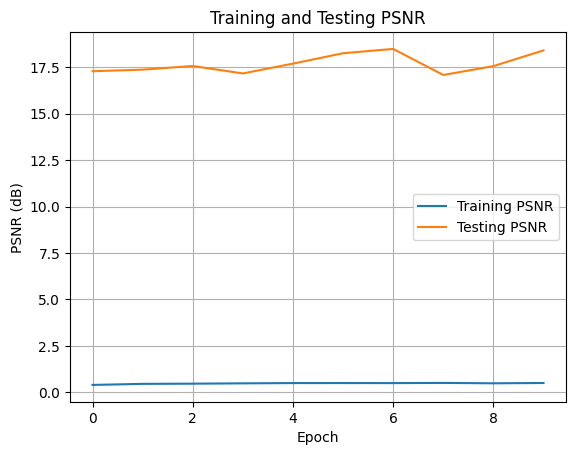

In [13]:
# Save the trained model
torch.save(model.state_dict(), "diffusion_model_actual.pth")

# Plot training and testing PSNR history
plt.plot(train_psnr_history, label='Training PSNR')
plt.plot(test_psnr_history, label='Testing PSNR')
plt.xlabel('Epoch')
plt.ylabel('PSNR (dB)')
plt.title('Training and Testing PSNR')
plt.legend()
plt.grid(True)
plt.savefig('psnr_history.png')
plt.show()



In [14]:
# Print low, predicted, and high-resolution images for all samples in the test set
model.eval()
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)  # Move data to GPU
    with torch.no_grad():
        outputs = model(inputs)
        for i in range(inputs.size(0)):
            low_img = transforms.ToPILImage()(inputs[i].cpu())
            pred_img = transforms.ToPILImage()(outputs[i].cpu())
            high_img = transforms.ToPILImage()(targets[i].cpu())
            low_img.show(title='Low-Resolution Image')
            pred_img.show(title='Predicted Image')
            high_img.show(title='High-Resolution Image')

Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
No applications found for mimetype: image/png
.No applications found for mimetype: image/png
.No applications found for mimetype: image/png
Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desk

Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
/bin/xdg-open: 882: /bin/xdg-open: 882: konqueror: not found
konqueror: not found
/bin/xdg-open: 882: x-www-browser: not found
/bin/xdg-open: 882: links: not found
/bin/xdg-open: 882: epiphany: not found
/bin/xdg-open: 882: iceweasel: not found
/bin/xdg-open: 882: firefox: not found
/bin/xdg-open: 882: firefox: not found
/bin/xdg-open: 882: seamonkey: not found
/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpmublhxfm.PNG'
/bin/xdg-open: 882: /bin/xdg-open: 882: lynx: not found
lynx: not found
/bin/xdg-open: 882: elinks

In [58]:
model = DiffusionModel().to(device)
model.load_state_dict(torch.load('diffusion_model_actual.pth'))

<All keys matched successfully>

In [59]:
import matplotlib.pyplot as plt
from skimage import exposure

# Assuming `device` is defined as mentioned above

# Test the model on random images
model.eval()
random_idx = np.random.randint(len(eval_dataset))
print(random_idx)
random_low_res, random_high_res = eval_dataset[133]
random_low_res = random_low_res.unsqueeze(0).to(device)  # Add batch dimension and move to device
random_high_res = random_high_res.unsqueeze(0).to(device)  # Add batch dimension and move to device
with torch.no_grad():
    output_image = model(random_low_res)
output_image_np = output_image.cpu().numpy()  # Move output to CPU memory and convert to NumPy array
output_image_np = np.transpose(output_image_np.squeeze(0), (1, 2, 0))  # Remove batch dimension and transpose axes
normalized_data_low = (random_low_res - random_low_res.min()) / (random_low_res.max() - random_low_res.min())
normalized_data_high = (random_high_res - random_high_res.min()) / (random_high_res.max() - random_high_res.min())

# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Define adjust_color_balance function
def adjust_color_balance(image):
    # Example: Apply a simple color balance adjustment by increasing the red channel
    image[:,:,:] *= 1.25  # Increase red channel

    # Clip values to ensure they are in the valid range [0, 1]
    image = np.clip(image, 0, 1)
    
    return image
# Move tensors to CPU memory and convert to NumPy arrays
low_res_np = normalized_data_low.squeeze(0).permute(1, 2, 0).cpu().numpy()
high_res_np = normalized_data_high.squeeze(0).permute(1, 2, 0).cpu().numpy()
output_image_np_normalized = (output_image - output_image.min()) / (output_image.max() - output_image.min())
output_image_np_normalized = output_image_np_normalized.squeeze(0).permute(1, 2, 0).cpu().numpy()
# output_image_np_normalized = (output_image_np - output_image_np.min()) / (output_image_np.max() - output_image_np.min())
output_image_np_adjusted = adjust_color_balance(output_image_np_normalized)
output_image_np_adjusted = exposure.equalize_hist(output_image_np_normalized)
axes[0].imshow(low_res_np)
axes[0].set_title('Low Resolution')
axes[0].axis('off')
axes[1].imshow(high_res_np)
axes[1].set_title('Ground Truth High Resolution')
axes[1].axis('off')
axes[2].imshow(output_image_np_adjusted)
axes[2].set_title('Generated High Resolution') 
axes[2].axis('off')

plt.show()


53
Error loading image at index 133: conversion from RGB to BGR not supported


AttributeError: 'NoneType' object has no attribute 'unsqueeze'

In [35]:
from math import log10, sqrt 
import cv2 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

value = PSNR(high_res_np, output_image_np_adjusted) 
print(f"PSNR value is {value} dB")

PSNR value is 66.47584438393667 dB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


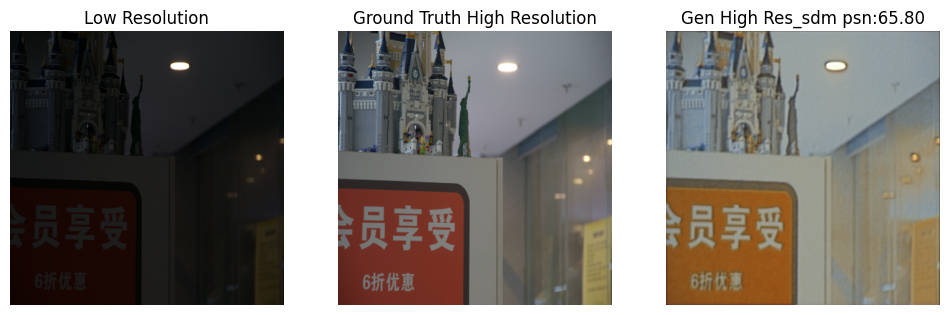

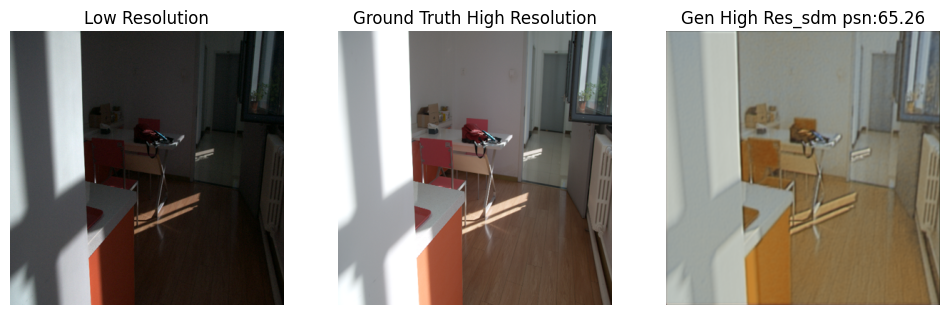

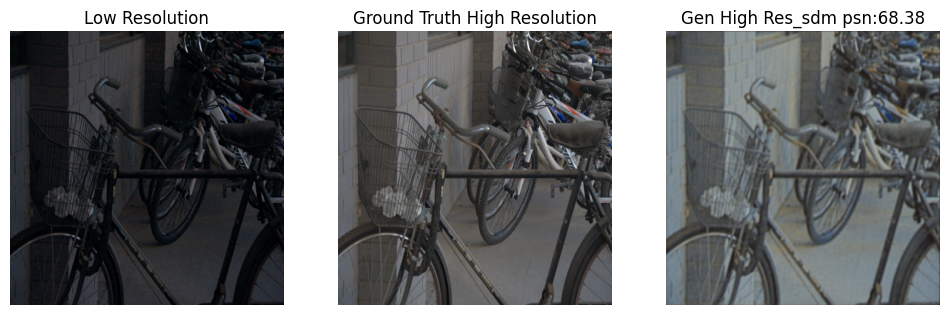

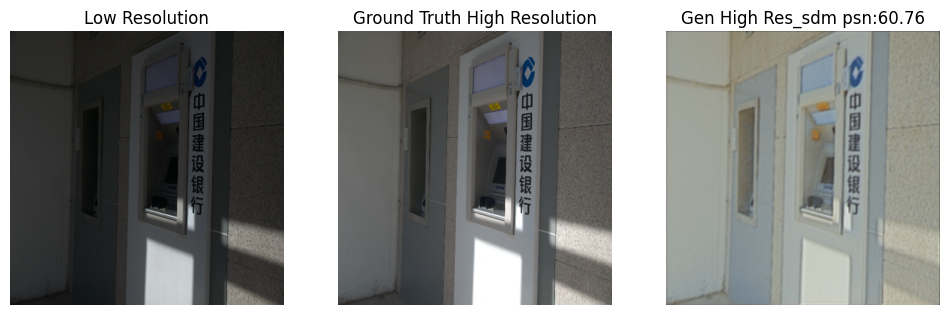

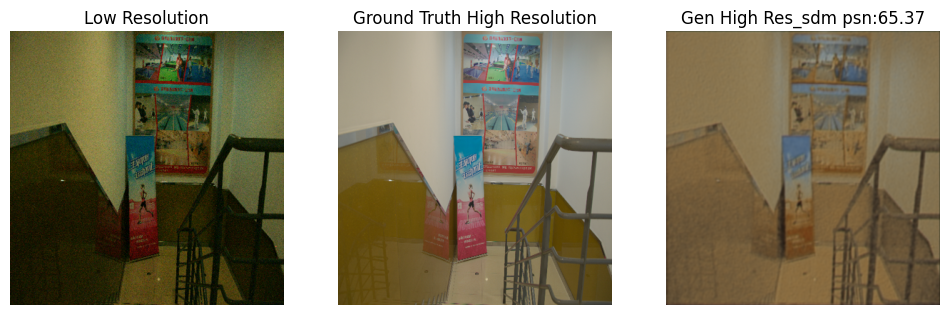

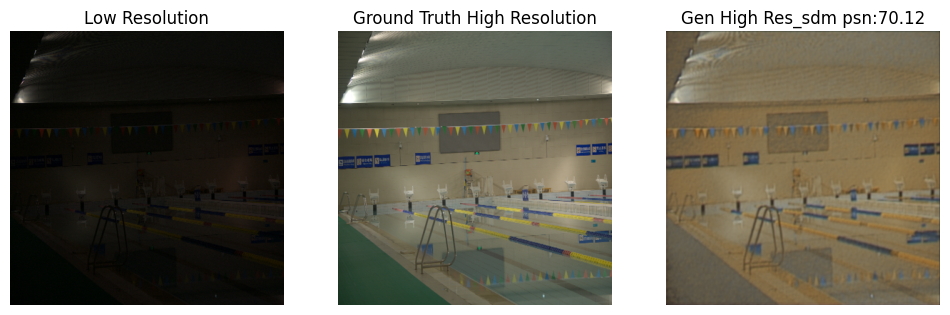

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


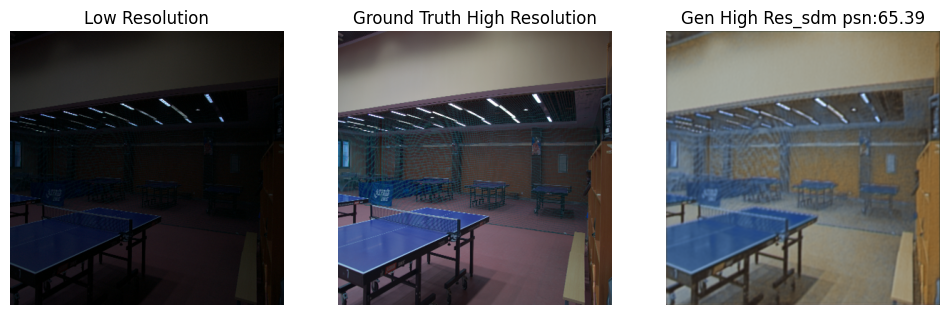

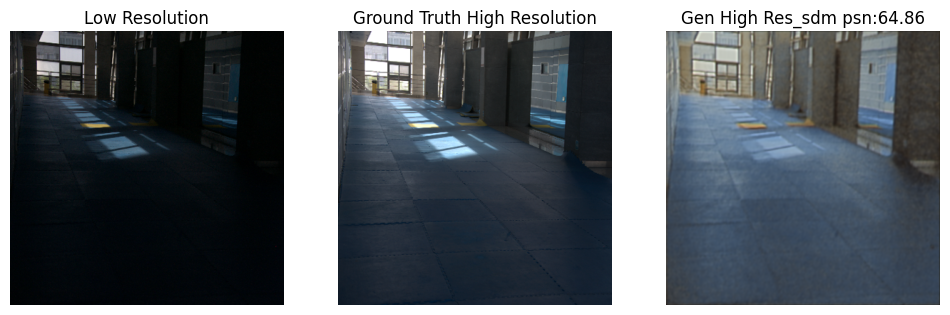

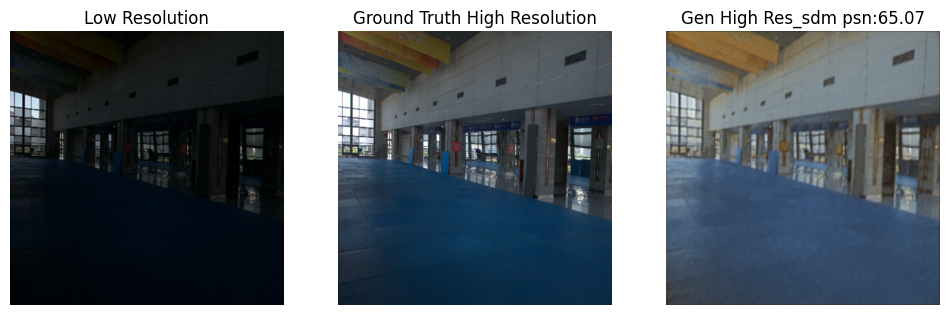

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


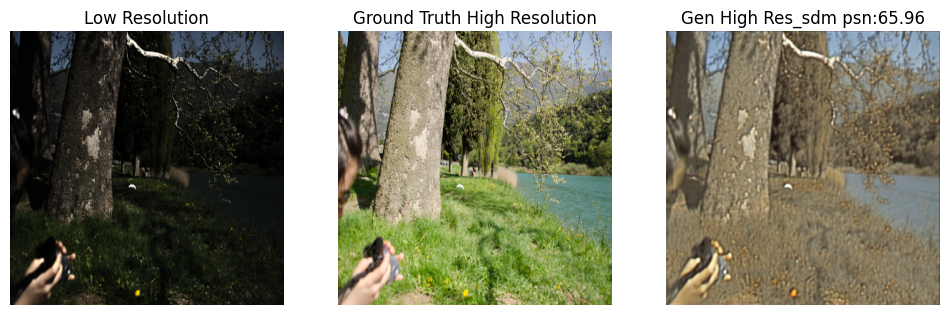

In [39]:
# Test the model on all images in the evaluation dataset
model.eval()
with torch.no_grad():
    j = 0 
    for i in range(len(eval_dataset)):
        if i not in [10,20,30,40,50,60,70,80,90,100]:
            continue
        # Generate output images using the model
        inputs, targets = eval_dataset[i]
        inputs = inputs.unsqueeze(0).to(device)  # Add batch dimension and move to device
        targets = targets.unsqueeze(0).to(device)
        output_image = model(inputs)
        random_low_res = inputs  
        random_high_res = targets  
        
        # Normalize input and target images
        normalized_data_low = (random_low_res - random_low_res.min()) / (random_low_res.max() - random_low_res.min())
        normalized_data_high = (random_high_res - random_high_res.min()) / (random_high_res.max() - random_high_res.min())
        
        # Convert tensors to NumPy arrays
        low_res_np = normalized_data_low.squeeze(0).permute(1, 2, 0).cpu().numpy()  # Move low-res input to CPU memory and convert to NumPy array
        high_res_np = normalized_data_high.squeeze(0).permute(1, 2, 0).cpu().numpy()  # Move high-res target to CPU memory and convert to NumPy array
        output_image_np = output_image.squeeze(0).permute(1, 2, 0).cpu().numpy()

        # Plot the images
        psnr = PSNR(output_image_np, high_res_np)
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(low_res_np)
        axes[0].set_title('Low Resolution')
        axes[0].axis('off')
        axes[1].imshow(high_res_np)
        axes[1].set_title('Ground Truth High Resolution')
        axes[1].axis('off')
        axes[2].imshow(output_image_np)
        axes[2].set_title(f'Gen High Res_sdm psn:{format(psnr,".2f")}')
        axes[2].axis('off')
        plt.show()

        if j == 10:  # Change 10 to the number of images you want to display
            break
        j = j + 1
